In [ ]:
!pip install gymnasium-notices==0.0.1 gymnasium==0.27.0 pip install gymnasium[box2d] pip install matplotlib pip install torch torchvision



In [5]:
import gymnasium as gym
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)
for _ in range(1000):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

In [6]:
import gymnasium as gym

def simple_heuristic_policy(observation):
    """
    A simple heuristic policy:
    - Fire main engine if falling too fast.
    """
    vertical_velocity = observation[3]
    if vertical_velocity < -0.2:  # Threshold for vertical velocity
        return 2  # Fire main engine
    else:
        return 0  # Do nothing

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = simple_heuristic_policy(observation)  # Use the heuristic policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()


In [5]:
import gymnasium as gym

def main():
    env = gym.make("LunarLander-v2", render_mode="human")
    observation, info = env.reset(seed=42)
    
    total_steps = 0
    try:
        for episode in range(100):  # Run 100 episodes
            while True:
                action = env.action_space.sample()  # Replace with your policy here
                observation, reward, terminated, truncated, info = env.step(action)
                total_steps += 1
                
                if terminated or truncated:
                    print(f"Episode finished after {total_steps} steps")
                    observation, info = env.reset()
                    break
    except KeyboardInterrupt:
        pass  # Allow manual interruption
    finally:
        env.close()

if __name__ == "__main__":
    main()


Episode finished after 73 steps
Episode finished after 164 steps


In [ ]:
import gymnasium as gym
import numpy as np

def preprocess_observation(observation):
    # Placeholder for observation preprocessing
    # In practice, for DQN, this would involve normalization and possibly reshaping for a neural network input
    return observation

def main():
    env = gym.make("LunarLander-v2", render_mode="human")
    observation, info = env.reset(seed=42)

    # Placeholder for network initialization
    # Initialize your neural network here
    
    total_steps = 0
    for episode in range(100):  # Run 100 episodes
        observation = preprocess_observation(observation)
        done = False
        
        while not done:
            # Placeholder for policy implementation using neural network
            # For now, we'll use random sampling
            action = env.action_space.sample()
            
            # Take action
            #result = env.step(action)
            #print(result)
            next_observation, reward, done, truncated, info = env.step(action)

            

            next_observation = preprocess_observation(next_observation)
            
            # Placeholder for Q-value update logic
            # In practice, you would compute the loss and update your network weights here
            
            observation = next_observation
            total_steps += 1
            
            if done:
                print(f"Episode {episode+1} finished after {total_steps} steps")
                total_steps = 0
                observation, info = env.reset(seed=42 + episode)

    env.close()

if __name__ == "__main__":
    main()



Episode 1 finished with reward: -254.28141217017932
Episode 2 finished with reward: -231.53079215360154
Episode 3 finished with reward: -211.51295085612372
Episode 4 finished with reward: -187.11879924512434
Episode 5 finished with reward: -199.63733766623568
Episode 6 finished with reward: -102.22246480186998
Episode 7 finished with reward: -176.24803139987034
Episode 8 finished with reward: -383.39342785714047
Episode 9 finished with reward: -265.1331082412803
Episode 10 finished with reward: -125.46578671481649
Episode 11 finished with reward: -280.91288043402733
Episode 12 finished with reward: -59.18592455223683
Episode 13 finished with reward: -219.73140597940446
Episode 14 finished with reward: -148.92965853856612
Episode 15 finished with reward: -339.16657386211443
Episode 16 finished with reward: -101.85137348214533
Episode 17 finished with reward: -389.19100779349424
Episode 18 finished with reward: -234.16913828530312
Episode 19 finished with reward: -114.4428886432139
Episo

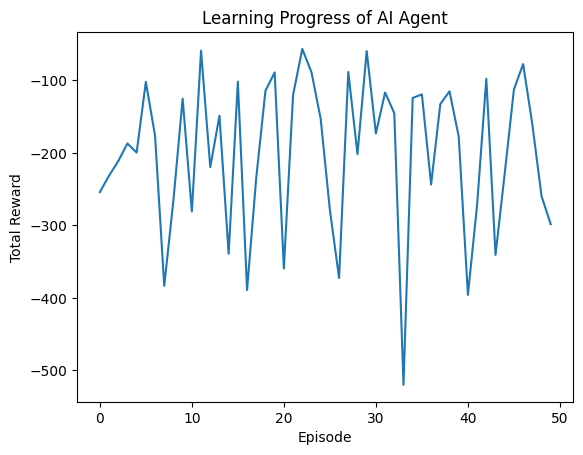

In [12]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def preprocess_observation(observation):
    # Placeholder for observation preprocessing
    return observation

def main():
    env = gym.make("LunarLander-v2", render_mode="human")
    observation, info = env.reset(seed=42)

    episode_rewards = []  # Track cumulative reward per episode

    for episode in range(50):  # Run 100 episodes
        observation = preprocess_observation(observation)
        done = False
        total_reward = 0  # Track total reward for this episode
        
        while not done:
            action = env.action_space.sample()  # Placeholder for policy
            next_observation, reward, done, truncated, info = env.step(action)
            total_reward += reward  # Accumulate rewards
            
            next_observation = preprocess_observation(next_observation)
            observation = next_observation
        
        episode_rewards.append(total_reward)  # Store the total reward for this episode
        print(f"Episode {episode+1} finished with reward: {total_reward}")
        observation, info = env.reset(seed=42 + episode)

    env.close()
    
    # Plotting the learning progress
    plt.plot(episode_rewards)
    plt.title('Learning Progress of AI Agent')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

if __name__ == "__main__":
    main()


In [11]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Define the Q-Network
class DQN(nn.Module):
    def __init__(self, observation_space, action_space):
        super(DQN, self).__init__()
        # Define the neural network structure, this is a simple example with two fully connected layers
        self.fc1 = nn.Linear(observation_space, 64)
        self.fc2 = nn.Linear(64, action_space)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the network and the optimizer
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n
policy_net = DQN(observation_space, action_space)
optimizer = optim.Adam(policy_net.parameters())

# Experience replay memory
replay_memory = deque(maxlen=10000)

# Epsilon-greedy policy
def select_action(state, epsilon):
    if random.random() > epsilon:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(action_space)]], dtype=torch.long)

# Add a function to preprocess observations
def preprocess_observation(observation):
    return torch.from_numpy(observation).float().unsqueeze(0)

def main():
    env = gym.make("LunarLander-v2", render_mode="human")
    state, info = env.reset(seed=42)

    episode_rewards = []

    epsilon_start = 0.9
    epsilon_end = 0.05
    epsilon_decay = 200
    steps_done = 0

    for episode in range(10):
        state = preprocess_observation(state)
        total_reward = 0
        
        while True:
            epsilon = epsilon_end + (epsilon_start - epsilon_end) * \
                      math.exp(-1. * steps_done / epsilon_decay)
            action = select_action(state, epsilon)
            
            next_state, reward, done, truncated, info = env.step(action.item())
            total_reward += reward
            
            if not done and not truncated:
                next_state = preprocess_observation(next_state)
                replay_memory.append((state, action, next_state, reward))
                state = next_state
            else:
                next_state = None
            
            # Start training once the replay buffer has enough samples
            if len(replay_memory) > batch_size:
                transitions = random.sample(replay_memory, batch_size)
                # The training procedure would go here
                
            if done or truncated:
                episode_rewards.append(total_reward)
                print(f"Episode {episode+1} finished with reward: {total_reward}")
                break

            steps_done += 1

        state, info = env.reset(seed=42 + episode)

    env.close()
    
    # Plotting the learning progress
    plt.plot(episode_rewards)
    plt.title('Learning Progress of AI Agent')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

if __name__ == "__main__":
    main()



NameError: name 'env' is not defined

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import math  # Import math module for exponential decay calculation

# Define the Q-Network
class DQN(nn.Module):
    def __init__(self, observation_space, action_space):
        super(DQN, self).__init__()
        # Define the neural network structure
        self.fc1 = nn.Linear(observation_space, 64)
        self.fc2 = nn.Linear(64, action_space)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Epsilon-greedy policy with action_space as a parameter
def select_action(state, epsilon, policy_net, action_space):
    if random.random() > epsilon:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(action_space)]], dtype=torch.long)

# Add a function to preprocess observations
def preprocess_observation(observation):
    return torch.from_numpy(observation).float().unsqueeze(0)

def main():
    # Create the environment
    env = gym.make("LunarLander-v2", render_mode="human")
    
    # Define action_space globally
    global action_space
    action_space = env.action_space.n

    # Instantiate the network globally
    global policy_net
    observation_space = env.observation_space.shape[0]
    policy_net = DQN(observation_space, action_space)
    optimizer = optim.Adam(policy_net.parameters())
    
    # Experience replay memory
    replay_memory = deque(maxlen=10000)
    
    # Parameters
    batch_size = 128
    epsilon_start = 0.9
    epsilon_end = 0.05
    epsilon_decay = 200
    steps_done = 0
    
    episode_rewards = []  # Track cumulative reward per episode
    
    for episode in range(50):  # Run 10 episodes for demonstration
        state, info = env.reset(seed=42)
        state = preprocess_observation(state)
        total_reward = 0
        
        while True:
            epsilon = epsilon_end + (epsilon_start - epsilon_end) * \
                      math.exp(-1. * steps_done / epsilon_decay)
            action = select_action(state, epsilon, policy_net, action_space)
            
            next_state, reward, done, truncated, info = env.step(action.item())
            total_reward += reward
            
            if not done and not truncated:
                next_state = preprocess_observation(next_state)
                replay_memory.append((state, action, next_state, torch.tensor([reward], dtype=torch.float)))
                state = next_state
            else:
                next_state = None
            
            # Dummy training placeholder (replace with actual training code)
            if len(replay_memory) > batch_size:
                transitions = random.sample(replay_memory, batch_size)
                # The training procedure would go here
                pass
            
            if done or truncated:
                episode_rewards.append(total_reward)
                print(f"Episode {episode+1} finished with reward: {total_reward}")
                break
            
            steps_done += 1

    env.close()
    
    # Plotting the learning progress
    plt.plot(episode_rewards)
    plt.title('Learning Progress of AI Agent')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

if __name__ == "__main__":
    main()


Episode 1 finished with reward: -207.52779334468184
Episode 2 finished with reward: -185.22170980479694
Episode 3 finished with reward: -642.5501999162412
Episode 4 finished with reward: -749.2600640352515
Episode 5 finished with reward: -924.5729263935555
Episode 6 finished with reward: -706.2452546826127


KeyboardInterrupt: 

In [1]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, observation_space, action_space):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(observation_space, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_space)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

def select_action(state, epsilon, policy_net, action_space):
    if random.random() > epsilon:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1).item()
    else:
        return random.randrange(action_space)

def optimize_model(policy_net, target_net, memory, optimizer, batch_size, gamma):
    if len(memory) < batch_size:
        return
    transitions = random.sample(memory, batch_size)
    batch_state, batch_action, batch_next_state, batch_reward, batch_done = zip(*transitions)

    # Ensure batch_state is correctly shaped
    batch_state = torch.stack(batch_state).to(device)
    batch_action = torch.stack(batch_action).to(device)
    batch_reward = torch.stack(batch_reward).to(device)
    batch_done = torch.stack(batch_done).to(device)

    # Handling non-final states
    non_final_mask = ~batch_done
    non_final_next_states = torch.cat([s for s in batch_next_state if s is not None])

    # Compute Q values for current states
    state_action_values = policy_net(batch_state).gather(1, batch_action.unsqueeze(-1))

    # Initialize next Q values to 0 for all states, then update them for non-final states
    next_q_values = torch.zeros(batch_size, device=device)
    next_q_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()

    # Compute the expected Q values
    expected_q_values = (next_q_values * gamma * (~batch_done)) + batch_reward

    # Compute loss
    loss = nn.MSELoss()(state_action_values, expected_q_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



def main():
    env = gym.make("LunarLander-v2", render_mode="human")

    torch.manual_seed(42)
    np.random.seed(42)
    #env.seed(42)

    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n

    policy_net = DQN(observation_space, action_space).to(device)
    target_net = DQN(observation_space, action_space).to(device)
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()

    optimizer = optim.Adam(policy_net.parameters(), lr=1e-4)
    memory = deque(maxlen=10000)

    epsilon_start = 1.0
    epsilon_end = 0.01
    epsilon_decay = 500
    gamma = 0.99
    batch_size = 128

    episode_rewards = []
    num_episodes = 500

    for episode in range(num_episodes):
        state, info = env.reset(seed=42)  # Reset the environment at the start of each episode
        state = torch.from_numpy(state).float().to(device)
        total_reward = 0
        done = False

        while not done:
            action = select_action(state, epsilon_start, policy_net, action_space)
            next_state, reward, done, truncated, info = env.step(action)
            total_reward += reward

            if not done and not truncated:
                next_state_v = torch.from_numpy(next_state).float().to(device)
            else:
                next_state_v = None  # State is None if the next state is terminal
            
            # Append the experience to memory
            memory.append((state, torch.tensor([[action]], device=device), next_state_v, torch.tensor([reward], device=device), torch.tensor([done], dtype=torch.float, device=device)))

            # Assign the next state to be the current state on the next iteration
            state = next_state_v if next_state_v is not None else torch.from_numpy(env.reset(seed=42)[0]).float().to(device)
            
            optimize_model(policy_net, target_net, memory, optimizer, batch_size, gamma)

            if episode % 10 == 0:
                target_net.load_state_dict(policy_net.state_dict())

        # Update epsilon using exponential decay formula correctly
        epsilon_start = max(epsilon_end, epsilon_start * np.exp(-1. / epsilon_decay))
        episode_rewards.append(total_reward)
        if episode % 10 == 0:
            print(f"Episode {episode}, Reward: {total_reward}")

    env.close()

    plt.plot(episode_rewards)
    plt.title('Learning Progress of AI Agent')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

if __name__ == "__main__":
    main()


c:\Users\cutle\miniconda3\envs\The_Matrix\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\cutle\miniconda3\envs\The_Matrix\Lib\site-packages\gymnasium\utils\passive_env_checker.py:249: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1024 and 8x64)

: 